In [ ]:
##MINST 為手寫數字數據集，它包含了一連串的手寫數字圖片，並且有相對應的數字

In [1]:
#cache=True,as_frame=False 如果版本問題跑不出來加這兩行
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1,cache=True,as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
!pip install --upgrade scikit-learn --user

In [5]:
x, y = mnist["data"], mnist["target"]
x.shape
#x為特徵資料，y為類別標籤
#總共7萬張圖像，每張圖為28*28像素

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
print(x.shape)
print(y.shape)

(70000, 784)
(70000,)


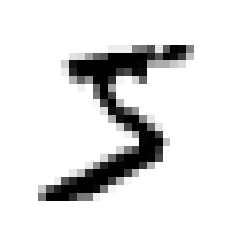

In [11]:
#資料中共有7000張圖片，我們可以用Matplotlib()的imshow()函數將其顯示出來
#其中some_digit儲存的是X[0]，故可以顯示出X[0]的影象
#plt.axis("off")  關閉X子軸
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x[0] 
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off") 
plt.show()

In [12]:
#標籤顯示是5
y[0]

'5'

In [14]:
#這個標籤用字元格式儲存，而我們的演演算法希望他是數位：
##astype(np.uint8)將字元轉換成數位
import numpy as np
y = y.astype(np.uint8)

In [17]:
#我們將前60000張圖片作為訓練集，後10000張圖片作為測試集
#前60000是資料集，後10000是測試集
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [ ]:
# 訓練二級分類器 Training a Binary Classifier

In [18]:
# True for all 5s, False for all other digits.
#我們先將y標籤改變（是5記為1，不是記為0）
y_train_5 = (y_train == 5) 

In [19]:
y_test_5 = (y_test == 5)

In [20]:
print(y_train_5)

[ True False False ...  True False False]


In [21]:
print(y)

[5 0 4 ... 4 5 6]


In [22]:
print(y_test_5)

[False False False ... False  True False]


In [23]:
#隨機梯度下降（SGD）分類器
#1.sgd_clf儲存的是我們用的訓練方法，用 .fit(輸入資料, 標籤) 來進行樣本訓練
#2.SGDClassfier本是隨機訓練，random_state是一個引數保證每次訓練結果相同，42是一個幸運數位而已
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
#Measuring Accuracy Using Cross-Validation 效能測量

In [26]:
#使用交叉驗證測量準確率
#本次我們用三個摺疊進行預測
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")
#輸出（每一個交叉驗證的準確率）：
#看似很高的分類準確率，但其實卻很低
#假設我們有一個分類器，將每張圖片都看成：非5
#事實表明它的準確率也會超過90%

array([0.95035, 0.96035, 0.9604 ])

In [27]:
#Estimator，中文意思就是估計器
#估算模型便是準確率
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
     def fit(self, x, y=None):
         pass
     def predict(self, x):
         return np.zeros((len(x), 1), dtype=bool)

In [28]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [ ]:
#混淆矩陣

In [30]:
#評估分類器效能的更好方法是混淆矩陣
#混淆矩陣會記錄A類別範例被分成B類別範例的次數，記錄在第A行第B列中。
##cross_val_predict: 一種直接的K-折交叉驗證，返回每個摺疊的預測
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [31]:
##獲取混淆矩陣
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [ ]:
#這表示，其中有53892張被正確的分為「非5」類別（True Negative）
#有687張被錯誤的分成了「5」(False Positive)
#有1891張被錯誤的分成了「非5」(False Negative)
#有3530張被正確的分為了「5」(True Positive)。

In [32]:
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [ ]:
#混淆矩陣能提供大量資訊，但是有時你希望指標更簡潔一點
#精度 TP/(TP+FP)

In [33]:
#precision_score 精度分數
from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(3530/(3530+687))

0.8370879772350012
0.8370879772350012


In [37]:
#recall_score召回分數
print(recall_score(y_train_5, y_train_pred))
print(3530/(3530+1891))

0.6511713705958311
0.6511713705958311


In [34]:
#f1_score F1分數：一個將精度和召回率結合的指標
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [39]:
some_digit = x[0]

In [ ]:
#我們先來看看SGDClassifier如何進行分類決策：
#對於每個範例，他會基於決策函數計算出一個分值，如果該值大於閾值，則為正類。
#閾值越高，召回率越低，（通常）精度越高
#比如我們先觀察一下X[0]的決策分數

In [35]:
# decision_fuction函數返回某個資料的決策分數
#比如我們先觀察一下X[0]的決策分數
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [41]:
#thresholds閾值 
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[ True]


In [42]:
##而我們對閾值的調整，會影響預測結果
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
print(y_some_digit_pred)

[False]


In [40]:
#我們現要通過cross_val_predict()獲得所有資料的決策分數
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3,
 method="decision_function")

In [43]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [44]:
#通過這些決策分數，計算每種可能的閾值的精度和召回率是多少
#計算所有可能的閾值的精度和召回率
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [45]:
#用畫布畫出影象
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

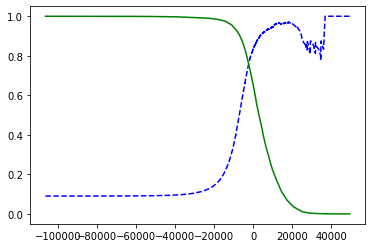

In [46]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [48]:
thresholds

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [47]:
#我們找到精度>=90%的第一個閾值索引
#返回精度>=90%的第一個閾值索引
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [48]:
threshold_90_recalls = thresholds[np.argmax(recalls >= 0.90)]

In [49]:
#用這個閾值來進行二分類，並計算出這樣分類的精度和召回率
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [50]:
#精度
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [51]:
#召回率
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [52]:
y_train_pred_90a = (y_scores >= threshold_90_recalls)

In [53]:
recall_score(y_train_5, y_train_pred_90a)

1.0

In [54]:
precision_score(y_train_5, y_train_pred_90a)

0.0904012273621719

In [63]:
##ROC曲線 
#ROC曲線的y軸為召回率，x軸為假正率

In [57]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [58]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')

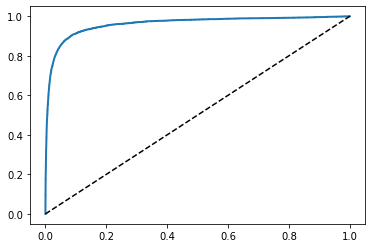

In [59]:
plot_roc_curve(fpr, tpr)
plt.show()

In [60]:
#ROC的面積的大小（曲線包含的右下角面積）代表了分類器的好壞，用ROC AUC來表示
#計算ROC曲線下面積（AUG）
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [62]:
#現在我們來用一個新的方法（隨機森林），來比較兩者的ROC AUC
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
 method="predict_proba")

In [63]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

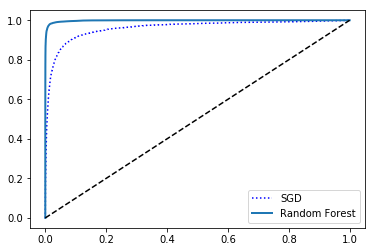

In [70]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()
#它更接近左上角，所以它的ROC AUC更高一些：

In [71]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145